In [78]:
import pandas as pd
import os 
from pathlib import Path
from bertopic import BERTopic
import re 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import plotly.io as pio

import pandas as pd
import os 
from pathlib import Path
from nltk.corpus import stopwords

from preprocessing.preprocessing_module import full_cleaning_pipeline


METAPROJECT_NAME = 'TopicModelling_META'
SUBPROJECT_NAME = 'TopMod_pipeline'
# dataset_name = f'{condition}_dataset.csv'


DATASET_NAME = "Handwritten_CombinedTranslation.csv"
HIGH_SENSORY = True #If False, corresponds to deep listening experience (no flicker)
# CONDITION = 'highsensory' if HIGH_SENSORY else 'deeplistening'
CONDITION = 'handwritten'
print(f'Condition : "{CONDITION}"')




PROJDIR = os.path.expanduser(f"~/projects/{METAPROJECT_NAME}")
DATADIR = os.path.join(PROJDIR,f'DATA/{DATASET_NAME}')
CODEDIR = os.path.join(PROJDIR,f'{SUBPROJECT_NAME}')



%matplotlib inline

Condition : "handwritten"


Parameters for BERTopic

https://maartengr.github.io/BERTopic/getting_started/embeddings/embeddings.html

In [79]:
from transformers.pipelines import pipeline


embedding_model = "all-MiniLM-L6-v2" #which transformer-based model to use to create embeddings of the reports
# embedding_model = pipeline("feature-extraction", model="distilbert-base-cased")
# topic_model = BERTopic(embedding_model=embedding_model)
min_topic_size = None 
min_topic_size_range = range(35, 5, -5)  # Adjust the range as per your requirement

Import Data

In [80]:
# Raw text data
dataset = pd.read_csv(DATADIR)['reflection_answer']
reports = pd.DataFrame(dataset[dataset.notna() & (dataset != '')].reset_index(drop=True)) #delete empty rows
reports

,reflection_answer
0,Felt like how I feel in the split second befor...
1,"Surreal\nConnection to other dimension, in a g..."
2,"\r\nDrifted into different stories, saw intens..."
3,"At the session start, I could only see orange ..."
4,Patterns were the main ‘visual’ when my eyes w...
...,...
3657,"I had a brief, very tangible experience, a vis..."
3658,I could see fractal patterns like I was in a k...
3659,"Vivid waves , transportation at speed from sun..."
3660,Felt a connection with the subconscious mind. ...


In [81]:
#Preprocessed text data
#check if preprocessed dataset already exist, and if not, create a preprocessed dataset and store it in the preprocessing folder

base_name, ext = os.path.splitext(DATASET_NAME)
new_path = f"{base_name}_{CONDITION}_preprocessed{ext}"
preproc_path = os.path.join(PROJDIR, f'DATA/preprocessed/{new_path}')

# Check if the preprocessed file already exists
if not os.path.exists(preproc_path):
    # If not, create it using the full_cleaning_pipeline function and save it
    reports = full_cleaning_pipeline(reports, 'reflection_answer')
    reports = reports.reset_index(drop=True)
    
    # Ensure the directory exists before saving the file
    os.makedirs(os.path.dirname(preproc_path), exist_ok=True)
    
    reports.to_csv(preproc_path, index=False)
else:
    reports = pd.read_csv(preproc_path)
    print(f"The preprocessed file already exists at: {preproc_path}")

data = reports['reflection_answer']

print('N={} reports (HighSensory = {})'.format(len(reports),HIGH_SENSORY))
reports.head()

N=3633 reports (HighSensory = True)


,reflection_answer
0,Felt like feel split second falling asleep
1,Unreal Connection dimension galaxy peace grati...
2,Drifted different stories saw intense colours ...
3,It session start could see orange blue orange ...
4,Patterns main visual eyes closed Not triangles...


## BERTopic

https://miro.medium.com/v2/resize:fit:4800/format:webp/0*DxAqCqx6dzg0KQlg.png

In [82]:
# finds the maximum min_topic_size that doesn't cause an error

def find_max_topics(data, embedding_model, min_topic_size_range):
    max_topics = 0
    optimal_min_topic_size = 0
    
    for min_size in min_topic_size_range:
        try:
            model = BERTopic(language="english", 
                             calculate_probabilities=True, 
                             verbose=True,
                             nr_topics='auto',
                             embedding_model=embedding_model,
                             min_topic_size=min_size)
            
            topics, _ = model.fit_transform(data)
            num_topics = len(set(topics))  # Calculate the number of unique topics
            
            if num_topics > max_topics:
                max_topics = num_topics
                optimal_min_topic_size = min_size
                
            print(f"Min_topic_size: {min_size}, Num Topics: {num_topics}")
            
        except ValueError as e:
            print(f"Error with min_topic_size: {min_size}. Error message: {str(e)}")
            continue
        
    return max_topics, optimal_min_topic_size







if not min_topic_size:
    max_topics, optimal_min_topic_size = find_max_topics(data, embedding_model, min_topic_size_range)
    print(f"Maximum number of topics: {max_topics} found with min_topic_size: {optimal_min_topic_size}")
else:
    optimal_min_topic_size = min_topic_size

print(f"Setting min_topic_size = {optimal_min_topic_size}")

Batches:   0%|          | 0/114 [00:00<?, ?it/s]

2023-10-13 11:47:54,321 - BERTopic - Transformed documents to Embeddings
2023-10-13 11:48:01,451 - BERTopic - Reduced dimensionality
2023-10-13 11:48:01,607 - BERTopic - Clustered reduced embeddings
2023-10-13 11:48:01,747 - BERTopic - Reduced number of topics from 10 to 5


Min_topic_size: 35, Num Topics: 5


Batches:   0%|          | 0/114 [00:00<?, ?it/s]

2023-10-13 11:48:13,783 - BERTopic - Transformed documents to Embeddings
2023-10-13 11:48:20,989 - BERTopic - Reduced dimensionality
2023-10-13 11:48:21,135 - BERTopic - Clustered reduced embeddings
2023-10-13 11:48:21,264 - BERTopic - Reduced number of topics from 10 to 4


Min_topic_size: 30, Num Topics: 4


Batches:   0%|          | 0/114 [00:00<?, ?it/s]

2023-10-13 11:48:34,083 - BERTopic - Transformed documents to Embeddings
2023-10-13 11:48:41,279 - BERTopic - Reduced dimensionality
2023-10-13 11:48:41,432 - BERTopic - Clustered reduced embeddings
2023-10-13 11:48:41,831 - BERTopic - Reduced number of topics from 13 to 13


Min_topic_size: 25, Num Topics: 13


Batches:   0%|          | 0/114 [00:00<?, ?it/s]

2023-10-13 11:48:54,852 - BERTopic - Transformed documents to Embeddings
2023-10-13 11:49:02,299 - BERTopic - Reduced dimensionality
2023-10-13 11:49:02,461 - BERTopic - Clustered reduced embeddings
2023-10-13 11:49:02,607 - BERTopic - Reduced number of topics from 17 to 6


Min_topic_size: 20, Num Topics: 6


Batches:   0%|          | 0/114 [00:00<?, ?it/s]

2023-10-13 11:49:14,976 - BERTopic - Transformed documents to Embeddings
2023-10-13 11:49:22,410 - BERTopic - Reduced dimensionality
2023-10-13 11:49:22,590 - BERTopic - Clustered reduced embeddings
2023-10-13 11:49:22,742 - BERTopic - Reduced number of topics from 23 to 19


Min_topic_size: 15, Num Topics: 19


Batches:   0%|          | 0/114 [00:00<?, ?it/s]

2023-10-13 11:49:35,034 - BERTopic - Transformed documents to Embeddings
2023-10-13 11:49:42,225 - BERTopic - Reduced dimensionality
2023-10-13 11:49:42,462 - BERTopic - Clustered reduced embeddings
2023-10-13 11:49:42,610 - BERTopic - Reduced number of topics from 38 to 25


Min_topic_size: 10, Num Topics: 25
Maximum number of topics: 25 found with min_topic_size: 10
Setting min_topic_size = 10


### Training the BERT model

In [72]:
from bertopic import BERTopic

model = BERTopic(language="english", calculate_probabilities=True, verbose=True,nr_topics='auto',embedding_model=embedding_model,min_topic_size=optimal_min_topic_size) #The higher the value of min_topic_size, the more specific the topics will be
topics, probs = model.fit_transform(reports['reflection_answer']) #Fit model to data : topics are the topic labels for each document, probs are the probabilities of each topic for each document
model.visualize_topics() #Visualize topics


Batches:   0%|          | 0/114 [00:00<?, ?it/s]

2023-10-10 14:19:33,159 - BERTopic - Transformed documents to Embeddings
2023-10-10 14:19:41,133 - BERTopic - Reduced dimensionality
2023-10-10 14:19:41,389 - BERTopic - Clustered reduced embeddings
2023-10-10 14:19:41,547 - BERTopic - Reduced number of topics from 41 to 41


### Topic extraction and representation

In [83]:
topic_freq = model.get_topic_freq().head() #Get the frequency of each topic
freq = model.get_topic_info() #see the most representative terms for each topic
print("N number of topics: ",len(freq))
print(freq.head())


N number of topics:  41
   Topic  Count                                     Name  \
0     -1   2136                  -1_like_felt_it_colours   
1      0    190                   0_felt_life_peace_love   
2      1    189                1_blue_red_patterns_green   
3      2    121  2_kaleidoscope_colours_sometimes_moving   
4      3     80                3_dream_machine_time_eyes   

                                      Representation  \
0  [like, felt, it, colours, experience, saw, sha...   
1  [felt, life, peace, love, like, it, time, spac...   
2  [blue, red, patterns, green, colours, shapes, ...   
3  [kaleidoscope, colours, sometimes, moving, lik...   
4  [dream, machine, time, eyes, experience, like,...   

                                 Representative_Docs  
0  [It hard describe saw Mostly intense colours b...  
1  [found light overwhelming alternating red gree...  
2  [Arm orange light felt like hot summer day Red...  
3  [Started bright light like Run When part flash...  
4  

## Prileminary visualisation

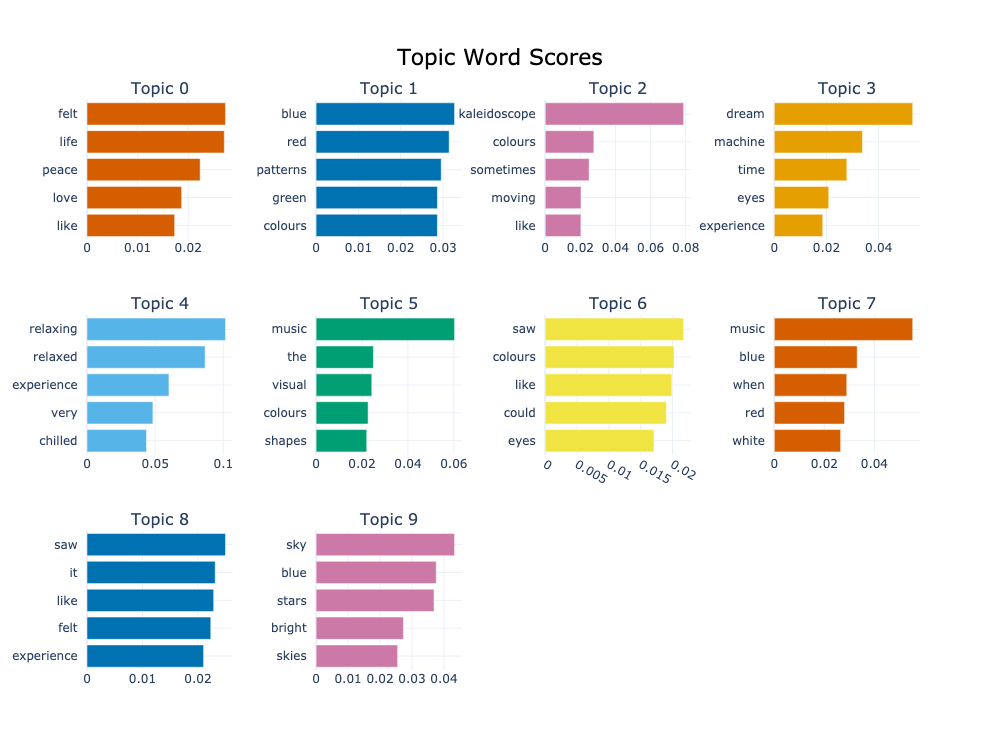

In [84]:
outputs_path = os.path.join(CODEDIR,f'BERT_outputs/{CONDITION}')

# Save the barchart visualization to a file
fig = model.visualize_barchart(top_n_topics=10) #Visualize the top 10 topics
save_path_barchart = os.path.join(outputs_path,'BERT_barchart.png')
fig.write_image(save_path_barchart)

# # Import the Image and display functions from IPython
# from IPython.display import Image, display

# Display the saved image
display(Image(filename=save_path_barchart))

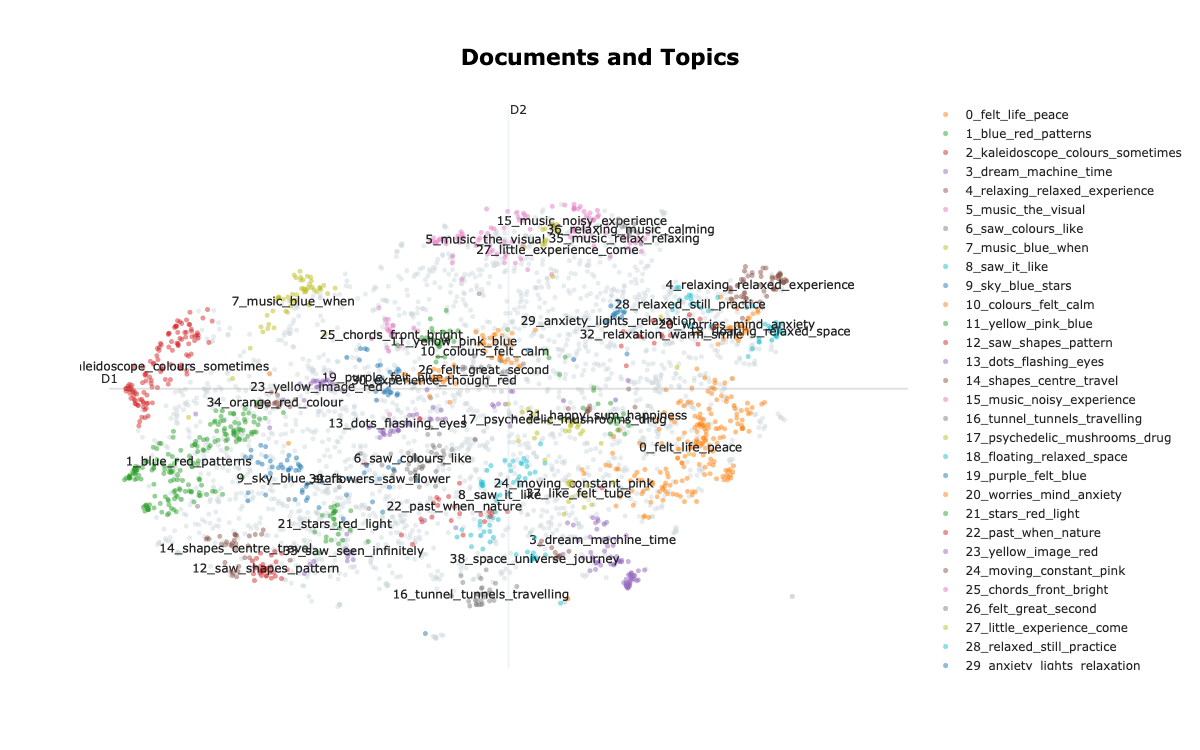

In [85]:
# Save the barchart visualization to a file
fig = model.visualize_documents(reports['reflection_answer'])
save_path_cloud = os.path.join(outputs_path,'BERT_cloud_{}.png'.format(CONDITION))
fig.write_image(save_path_cloud)

# # Import the Image and display functions from IPython
# from IPython.display import Image, display

# Display the saved image
display(Image(filename=save_path_cloud))

In [86]:
model.visualize_heatmap(top_n_topics=10) #Visualize the top 10 topics as a heatmap